In [2]:
#import required libraries 

from sklearn.impute import SimpleImputer 
import pandas as pd 
import numpy as np 
import sys


In [3]:
#import the dataset
dataset=pd.read_csv('attractions_of_nepal.csv')

In [4]:
print(dataset.head())

                   title avg_rating  voted_by            genre
0       Boudhanath Stupa        4.5      8897  Religious Sites
1  Phewa Tal (Fewa Lake)        4.5      2988  Bodies of Water
2              Sarangkot        4.5      2199        Mountains
3   Swayambhunath Temple        4.5      6203  Religious Sites
4              Poon Hill        4.5      1477        Mountains


In [7]:
print(dataset['title'].values.tolist())

['Boudhanath Stupa', 'Phewa Tal (Fewa Lake)', 'Sarangkot', 'Swayambhunath Temple', 'Poon Hill', 'Peace Temple', 'Pashupatinath Temple', 'Durbar (Central) Square', 'Chandragiri Hills', 'Mount Everest', 'Begnas Lake', 'Golden Temple (Hiranya Varna Mahavihar)', 'Patan Museum', 'International Mountain Museum', 'Bhaktapur Durbar Square', 'Narayani River', 'Kopan Monastery', 'Thamel', 'Nagarkot Panoramic Hiking Trail', 'Gokyo Lakes', 'Patan Durbar Square', 'Garden of Dreams', 'Namo Buddha (Stupa)', 'Polar Trekking & Expedition  - Day Tours', 'Kathmandu Durbar Square', 'Chitwan National Park', 'Gupteswar Gupha', 'Trisuli River', "Devi's Fall", 'Gurkha Memorial Museum', 'Muktinath Temple', 'Barahi temple', 'Maya Devi Temple', 'Annapurna Base Camp Trek', 'Annapurna Mountain Range', 'Bindhya Basini Temple', 'Kala Patthar', 'Asan', 'Bishazari Tal', 'Jomsom Muktinath Trek', 'Shivapuri Nagarjun National Park', 'Mahaboudha Temple', 'Kailashnath Mahadev', 'Dakshinkali Temple', 'Budhanilkantha', 'Kris

In [319]:
#replace the Nan with np.nan
dataset.replace('N',np.nan,inplace=True)

In [320]:
#print the number of missing values
print(pd.isna(dataset).sum().sum())

768


In [321]:
#convert the avg_rating column into float 
dataset['avg_rating']=pd.to_numeric(dataset['avg_rating'])

In [322]:
#avg ratings of the locations around Kathmandu
print(dataset['avg_rating'].mean())

4.771905697445972


In [158]:
#highest avg rating given to a location in Ktm 
print(dataset['avg_rating'].max())
#print locations given the highest ratings 
print(dataset[dataset['avg_rating']==dataset['avg_rating'].max()])

5.0
                                                  title  avg_rating  voted_by  \
41    Cathedral of the Assumption of the Blessed Vir...         5.0        12   
49                 Boudha Farmers Market at Utpala Cafe         5.0        15   
50                 Chhango Adventure Canyoning In Nepal         5.0        20   
66                                           Shanti Spa         5.0        15   
71                                Music Museum of Nepal         5.0         7   
...                                                 ...         ...       ...   
1820                                     NTB Adventures         5.0        22   
1821                            S Nepal Tours & Travels         5.0         1   
1822                             Best Trekking in Nepal         5.0        15   
1824                        Beyond Himalaya - Day Tours         5.0         6   
1825            Khumbu Nangpala Trekking and Expedition         5.0         3   

                       

In [323]:
#lowest avg rating given to a location in Ktm 
print(dataset['avg_rating'].min())
#print locations given the lowest ratings 
print(dataset[dataset['avg_rating']==dataset['avg_rating'].min()])

1.0
                                             title  avg_rating  voted_by  \
383                              Lokta Paper Craft         1.0         1   
407                      Department of Immigration         1.0         3   
2489                        Salesways Super Market         1.0         1   
2490                          Bajrayogini Pashmina         1.0         1   
2491                 Travel In Nepal Treks Pvt Ltd         1.0         1   
2492                               Travel Junction         1.0         1   
2497                                    Bunk Tribe         1.0         1   
2501                            Talixo - Kathmandu         1.0         1   
2521                                  Blissful Spa         1.0         2   
2553  Himalayan Little Buddha Treks And Expedition         1.0         1   

                                                  genre  
383                      Points of Interest & Landmarks  
407                                Governme

In [330]:
#replace the missing values with the mean of the columns 
imputer=SimpleImputer(missing_values=np.nan,strategy='mean')
imputer.fit((dataset['avg_rating']).values.reshape(-1,1))
new_avg_rating=imputer.transform(dataset['avg_rating'].values.reshape(-1,1))

In [331]:
print(new)

[[4.5]
 [4.5]
 [4.5]
 ...
 [3. ]
 [3. ]
 [3. ]]


In [332]:
#replace the avg rating column with the new avg rating array 
dataset['avg_rating']=new_avg_rating

In [333]:
print(dataset)

                                    title  avg_rating  voted_by  \
0                        Boudhanath Stupa    4.500000      8897   
1                   Phewa Tal (Fewa Lake)    4.500000      2988   
2                               Sarangkot    4.500000      2199   
3                    Swayambhunath Temple    4.500000      6203   
4                               Poon Hill    4.500000      1477   
...                                   ...         ...       ...   
3308  SITA (Travel Corporation India Ltd)    4.771906         0   
3309                       Himalayan Hike    4.771906         0   
3310                               Harilo    4.771906         0   
3311                           Heli Sight    4.771906         0   
3312                            River Fun    4.771906         0   

                                            genre  
0                                 Religious Sites  
1                                 Bodies of Water  
2                                      

In [334]:
print(dataset['genre'].unique())

['Religious Sites' 'Bodies of Water' 'Mountains'
 'Points of Interest & Landmarks' 'Art Museums' 'Speciality Museums'
 'Ancient Ruins • Points of Interest & Landmarks' 'Neighborhoods'
 'Hiking Trails' 'Points of Interest & Landmarks • Historic Walking Areas'
 'Gardens' 'Points of Interest & Landmarks • Religious Sites'
 'Parasailing & Paragliding • River Rafting & Tubing'
 'Historic Sites • Points of Interest & Landmarks'
 'National Parks • Nature & Wildlife Areas' 'Caverns & Caves' 'Waterfalls'
 'History Museums' 'Mountains • Hiking Trails' 'Flea & Street Markets'
 'National Parks' 'Monuments & Statues' 'Historic Sites • Religious Sites'
 'Nature & Wildlife Areas • Hiking Trails'
 'Points of Interest & Landmarks • Architectural Buildings'
 'Nature & Wildlife Areas' 'Nature & Wildlife Areas • Caverns & Caves'
 'Valleys' 'Historic Sites' 'Lookouts • Religious Sites'
 'Mysterious Sites • Religious Sites' 'Architectural Buildings' 'Parks'
 'Shopping Malls' 'Lookouts' 'Hot Springs & Geyser

In [335]:
dataset['genre']

0                                   Religious Sites
1                                   Bodies of Water
2                                         Mountains
3                                   Religious Sites
4                                         Mountains
                           ...                     
3308                Multi-day Tours • Balloon Rides
3309                   City Tours • Multi-day Tours
3310                                Farmers Markets
3311    Parasailing & Paragliding • Multi-day Tours
3312      River Rafting & Tubing • Taxis & Shuttles
Name: genre, Length: 3313, dtype: object

In [336]:
genre_arr=[] #store all values for each row in this array
for i in range(len(dataset['genre'])):
    arr=[] #array to store stripped items
    splitted_arr=dataset['genre'][i].split('•')
    for item in splitted_arr:
        new_stripped_item=item.strip()
        arr.append(new_stripped_item)
    genre_arr.append(arr)

dataset['genre']=genre_arr

In [337]:
dataset

,title,avg_rating,voted_by,genre
0,Boudhanath Stupa,4.500000,8897,[Religious Sites]
1,Phewa Tal (Fewa Lake),4.500000,2988,[Bodies of Water]
2,Sarangkot,4.500000,2199,[Mountains]
3,Swayambhunath Temple,4.500000,6203,[Religious Sites]
4,Poon Hill,4.500000,1477,[Mountains]
...,...,...,...,...
3308,SITA (Travel Corporation India Ltd),4.771906,0,"[Multi-day Tours, Balloon Rides]"
3309,Himalayan Hike,4.771906,0,"[City Tours, Multi-day Tours]"
3310,Harilo,4.771906,0,[Farmers Markets]
3311,Heli Sight,4.771906,0,"[Parasailing & Paragliding, Multi-day Tours]"


In [338]:
print(dataset['genre'])

0                                  [Religious Sites]
1                                  [Bodies of Water]
2                                        [Mountains]
3                                  [Religious Sites]
4                                        [Mountains]
                            ...                     
3308                [Multi-day Tours, Balloon Rides]
3309                   [City Tours, Multi-day Tours]
3310                               [Farmers Markets]
3311    [Parasailing & Paragliding, Multi-day Tours]
3312      [River Rafting & Tubing, Taxis & Shuttles]
Name: genre, Length: 3313, dtype: object


In [339]:
#append all the items in the individual list from genre into a super list 
super_genre_list=[]
for each_list in dataset['genre']:
    for item in each_list:
        super_genre_list.append(item)

#convert that into set to have only the unique values 
superset=set((super_genre_list))

In [340]:
print(superset)

{'Art Galleries', 'Architectural Buildings', 'Horse-Drawn Carriage Tours', 'Vespa, Scooter & Moped Tours', 'Amusement & Theme Parks', 'Archaeology Tours', 'Nature & Wildlife Tours', 'Antique Shops', 'Convention Centers', 'Neighborhoods', 'Motorcycle Tours', 'Theaters', 'Government Buildings', 'Shopping Tours', 'Dance Clubs & Discos', 'Motorcycle Trails', 'Distilleries', 'Visitor Centers', 'Kayaking & Canoeing', 'Ski & Snow Tours', 'Hot Springs & Geysers', 'Factory Tours', 'Water Parks', 'Other Outdoor Activities', 'National Parks', 'Distillery Tours', 'Bars & Clubs', 'Horseback Riding Tours', 'Golf Courses', 'Caverns & Caves', 'Canyoning & Rappelling Tours', 'Coffee & Tea Tours', 'Multi-day Tours', 'Historic Sites', 'Universities & Schools', 'Submarine Tours', 'Walking Tours', 'Waterfalls', 'Military Museums', '4WD, ATV & Off-Road Tours', 'Zoos', 'Fishing Charters & Tours', 'Factory Outlets', 'Playgrounds', 'Game & Entertainment Centers', 'Forests', 'Mountains', 'Private Tours', 'Escap

In [342]:
print(len(superset))

128


In [346]:
#superset in the 'ktm' dataset 
test={'Art Galleries', 'Architectural Buildings', 'Horse-Drawn Carriage Tours', 'Vespa, Scooter & Moped Tours', \
      'Amusement & Theme Parks', 'Archaeology Tours', 'Nature & Wildlife Tours', 'Antique Shops', 'Convention Centers',\
      'Neighborhoods', 'Motorcycle Tours', 'Government Buildings', 'Shopping Tours', 'Theaters', 'Dance Clubs & Discos',\
      'Motorcycle Trails', 'Distilleries', 'Visitor Centers', 'Kayaking & Canoeing', 'Ski & Snow Tours', 'Factory Tours',\
      'Other Outdoor Activities', 'National Parks', 'Distillery Tours', 'Bars & Clubs', 'Horseback Riding Tours', \
      'Canyoning & Rappelling Tours', 'Coffee & Tea Tours', 'Multi-day Tours', 'Historic Sites', 'Submarine Tours',\
      'Walking Tours', 'Waterfalls', 'Military Museums', '4WD, ATV & Off-Road Tours', 'Fishing Charters & Tours', \
      'Factory Outlets', 'Playgrounds', 'Game & Entertainment Centers', 'Forests', 'Mountains', 'Private Tours', \
      'Scenic Walking Areas', 'Safaris', 'Taxis & Shuttles', 'Food Tours', 'Dams', 'Zipline & Aerial Adventure Parks',\
      'Biking Trails', 'Gear Rentals', 'Bike Tours', 'Climbing Tours', 'Health Clubs', 'Speciality & Gift Shops', \
      'Speciality Museums', 'Eco Tours', 'Parks', 'Boat Tours', 'River Rafting & Tubing', 'Gardens', 'Movie Theaters',\
      'Cultural Tours', 'Lessons & Workshops', 'Karaoke Bars', 'Theatre & Performances', 'Natural History Museums', \
      'Sports Camps & Clinics', 'Points of Interest & Landmarks', 'Day Trips', 'Wineries & Vineyards', 'Water Sports', \
      'Spas', 'Shopping Malls', 'Sports Complexes', 'Bus Services', 'Historical & Heritage Tours', "Children's Museums",\
      'City Tours', 'Parasailing & Paragliding', 'Balloon Rides', 'Photography Tours', 'Self-Guided Tours & Rentals',\
      'Religious Sites', 'Paint & Pottery Studios', 'Hiking & Camping Tours', 'Bus Tours', 'Churches & Cathedrals',\
      'Valleys', 'Art Museums', 'Hiking Trails', 'Adrenaline & Extreme Tours', 'Libraries', 'Beer Tastings & Tours',\
      'Monuments & Statues', 'Lookouts', 'Helicopter Tours', 'Sightseeing Tours', 'Casinos', 'Cooking Classes',\
      'Air Tours', 'Historic Walking Areas', 'Bodies of Water', 'Nature & Wildlife Areas', 'History Museums', \
      'Farmers Markets', 'Flea & Street Markets', 'Yoga & Pilates', 'Bar, Club & Pub Tours'}

In [347]:
print(superset.difference(test))

{'Universities & Schools', 'Literary, Art & Music Tours', 'Zoos', 'Cemeteries', 'Farms', 'Mysterious Sites', 'Surfing & Windsurfing', 'Escape Games', 'Department Stores', 'Geologic Formations', 'Ski & Snowboard Areas', 'Hot Springs & Geysers', 'Water Parks', 'Scenic Drives', 'Ancient Ruins', 'Nan', 'Blues Bars', 'Golf Courses', 'Wine Tours & Tastings', 'Caverns & Caves'}


In [349]:
#make checklists
industries_checklist=['Distilleries','Factory Tours','Factory Outlets','Lessons & Workshops', 'Wineries & Vineyards',\
                     'Farms',]
health_and_lifestyle_checklist=['Sports Camps & Clinics','Spas','Yoga & Pilates','Universities & Schools',\
                                'Farms','Department Stores','Hot Springs & Geysers',]
food_checklist=['Coffee & Tea Tours','Food Tours','Wineries & Vineyards', 'Beer Tastings & Tours',\
               'Cooking Classes','Farmers Markets','Wine Tours & Tastings',]

entertainment_checklist=['Horse-Drawn Carriage Tours', 'Vespa, Scooter & Moped Tours', 'Amusement & Theme Parks',\
                        'Shopping Tours', 'Theaters', 'Dance Clubs & Discos','Other Outdoor Activities',\
                        'Bars & Clubs','Coffee & Tea Tours','Fishing Charters & Tours','Playgrounds', 'Game & Entertainment Centers',\
                        'Food Tours','Movie Theaters','Karaoke Bars','Theatre & Performances','Shopping Malls', 'Sports Complexes',\
                        'City Tours','Self-Guided Tours & Rentals','Farmers Markets', 'Flea & Street Markets',\
                        'Bar, Club & Pub Tours','Casinos','Literary, Art & Music Tours','Zoos','Surfing & Windsurfing',\
                        'Escape Games','Ski & Snowboard Areas','Water Parks','Scenic Drives','Blues Bars',\
                        'Golf Courses',]

religious_checklist=['Art Galleries','Archaeology Tours','Antique Shops','Cultural Tours','Religious Sites',\
                     'Monuments & Statues','Cemeteries',]

adventure_checklist=['Archaeology Tours', 'Nature & Wildlife Tours','Kayaking & Canoeing', 'Ski & Snow Tours',\
                    'Motorcycle Trails', 'Horseback Riding Tours', 'Canyoning & Rappelling Tours',\
                     'Safaris','Zipline & Aerial Adventure Parks', 'Biking Trails', 'Gear Rentals', 'Bike Tours',\
                     'Climbing Tours','Eco Tours','River Rafting & Tubing','Sports Camps & Clinics',\
                     'Parasailing & Paragliding', 'Balloon Rides', 'Photography Tours','4WD, ATV & Off-Road Tours',\
                     'Hiking & Camping Tours', 'Bus Tours','Hiking Trails', 'Adrenaline & Extreme Tours',\
                     'Helicopter Tours', 'Sightseeing Tours','Nature & Wildlife Areas','Submarine Tours',\
                     'Mysterious Sites','Surfing & Windsurfing','Escape Games','Ski & Snowboard Areas',\
                    ]
nature_checklist=['Nature & Wildlife Tours','Dams','National Parks','Fishing Charters & Tours','Forests', 'Mountains', 'Private Tours',\
                  'Scenic Walking Areas','Safaris','Climbing Tours','Points of Interest & Landmarks','Wineries & Vineyards',\
                  'Water Sports','Valleys','Hiking Trails','Adrenaline & Extreme Tours','Lookouts', 'Helicopter Tours',\
                  'Sightseeing Tours', 'Air Tours','Bodies of Water', 'Nature & Wildlife Areas','Zoos',\
                  'Mysterious Sites','Surfing & Windsurfing','Geologic Formations','Caverns & Caves',\
                 ]

art_and_architecture_checklist=['Art Galleries','Architectural Buildings','Archaeology Tours','Antique Shops','Government Buildings',\
                      'Historic Sites','Military Museums','Speciality & Gift Shops','Theaters','Cultural Tours',\
                      'Natural History Museums','Points of Interest & Landmarks','Historical & Heritage Tours', "Children's Museums",\
                      'City Tours','Religious Sites','Paint & Pottery Studios','Churches & Cathedrals',\
                      'Art Museums','Libraries','Monuments & Statues','Lookouts','History Museums','Convention Centers',\
                      'Movie Theaters','Sightseeing Tours','Historic Walking Areas','Literary, Art & Music Tours',\
                      'Mysterious Sites','Ancient Ruins','Blues Bars',\
                      ]

history_checklist=['Art Galleries','Architectural Buildings','Archaeology Tours','Antique Shops','Government Buildings',\
                  'Multi-day Tours','Historic Sites','Military Museums','Speciality & Gift Shops',\
                  'Natural History Museums','Points of Interest & Landmarks','Historical & Heritage Tours', "Children's Museums",\
                  'City Tours','Religious Sites','Paint & Pottery Studios','Churches & Cathedrals',\
                  'Art Museums','Libraries','Monuments & Statues','Lookouts','History Museums','Convention Centers',\
                  'Factory Tours','Historic Walking Areas','Literary, Art & Music Tours','Mysterious Sites',\
                   'Ancient Ruins',\
                  ]

## Adding more columns to genre to make it easier for recommendation 

Columns to add :<b> History,Art and Architecture,Religious,Nature,Adventure,Entertainment,Food,Health and Lifesyle,Industries</b>

Columns will be given value for each record as per the description in the original 'genre' column

In [350]:
def assign_history_col(dataset):
    '''assigns history column'''
    history_arr=[]
    #iterate through every row of dataset 
    for each_list in dataset['genre']:
        for item in each_list:
            #history column
            if(any(check_item.lower() == item.lower() for check_item in history_checklist)):
                history_arr.append(True)
                break
            else:
                history_arr.append(False)
                break
    return history_arr

In [351]:
history_arr=assign_history_column(dataset)
dataset['history']=history_arr

In [352]:
def assign_art_and_architecture_col(dataset):
    '''assigns art_and_architecture column'''    
    art_and_architecture_arr=[]
    #iterate through every row of dataset 
    for each_list in dataset['genre']:
        for item in each_list:
            if(any(check_item.lower() == item.lower() for check_item in art_and_architecture_checklist)):
                art_and_architecture_arr.append(True)
                break
            else:
                art_and_architecture_arr.append(False)
                break
    return art_and_architecture_arr

In [353]:
art_and_architecture_arr=assign_art_and_architecture_col(dataset)
dataset['art_and_architecture']=art_and_architecture_arr

In [354]:
def assign_nature_col(dataset):
    '''assigns nature column'''
    nature_arr=[]
    #iterate through every row of dataset 
    for each_list in dataset['genre']:
        for item in each_list:
            if(any(check_item.lower() == item.lower() for check_item in nature_checklist)):
                nature_arr.append(True)
                break
            else:
                nature_arr.append(False)
                break
    return nature_arr

In [355]:
nature_arr=assign_nature_col(dataset)
dataset['nature']=nature_arr

In [356]:
def assign_adventure_col(dataset):
    '''assigns adventure column'''
    adventure_arr=[]
    #iterate through every row of dataset 
    for each_list in dataset['genre']:
        for item in each_list:
            if(any(check_item.lower() == item.lower() for check_item in adventure_checklist)):
                adventure_arr.append(True)
                break
            else:
                adventure_arr.append(False)
                break
    return adventure_arr

In [357]:
adventure_arr=assign_adventure_col(dataset)
dataset['adventure']=adventure_arr

In [358]:
def assign_entertainment_col(dataset):
    '''assigns entertainment column'''
    entertainment_arr=[]
    #iterate through every row of dataset 
    for each_list in dataset['genre']:
        for item in each_list:
            if(any(check_item.lower() == item.lower() for check_item in entertainment_checklist)):
                entertainment_arr.append(True)
                break
            else:
                entertainment_arr.append(False)
                break
    return entertainment_arr

In [359]:
entertainment_arr=assign_entertainment_col(dataset)
dataset['entertainment']=entertainment_arr

In [360]:
def assign_health_and_lifestyle_col(dataset):
    '''assigns health_and_lifestyle column'''
    health_and_lifestyle_arr=[]
    #iterate through every row of dataset 
    for each_list in dataset['genre']:
        for item in each_list:
            if(any(check_item.lower() == item.lower() for check_item in health_and_lifestyle_checklist)):
                health_and_lifestyle_arr.append(True)
                break
            else:
                health_and_lifestyle_arr.append(False)
                break
    return health_and_lifestyle_arr

In [361]:
health_and_lifestyle_arr=assign_health_and_lifestyle_col(dataset)
dataset['health_and_lifestyle']=health_and_lifestyle_arr

In [362]:
def assign_food_col(dataset):
    '''assigns food column'''
    food_arr=[]
    #iterate through every row of dataset 
    for each_list in dataset['genre']:
        for item in each_list:
            if(any(check_item.lower() == item.lower() for check_item in food_checklist)):
                food_arr.append(True)
                break
            else:
                food_arr.append(False)
                break
    return food_arr

In [363]:
food_arr=assign_food_col(dataset)
dataset['food']=food_arr

In [364]:
def assign_industries_col(dataset):
    '''assigns industries column'''
    industries_arr=[]
    #iterate through every row of dataset 
    for each_list in dataset['genre']:
        for item in each_list:
            if(any(check_item.lower() == item.lower() for check_item in industries_checklist)):
                industries_arr.append(True)
                break
            else:
                industries_arr.append(False)
                break
    return industries_arr

In [365]:
industries_arr=assign_industries_col(dataset)
dataset['industries']=industries_arr

In [366]:
dataset['avg_rating'].min()def assign_religious_col(dataset):
    '''assigns religious column'''
    religious_arr=[]
    #iterate through every row of dataset 
    for each_list in dataset['genre']:
        for item in each_list:
            if(any(check_item.lower() == item.lower() for check_item in religious_checklist)):
                religious_arr.append(True)
                break
            else:
                religious_arr.append(False)
                break
    return religious_arr

In [367]:
religious_arr=assign_religious_col(dataset)
dataset['religious']=religious_arr
print(dataset.head())

                   title  avg_rating  voted_by              genre  history  \
0       Boudhanath Stupa         4.5      8897  [Religious Sites]     True   
1  Phewa Tal (Fewa Lake)         4.5      2988  [Bodies of Water]    False   
2              Sarangkot         4.5      2199        [Mountains]    False   
3   Swayambhunath Temple         4.5      6203  [Religious Sites]     True   
4              Poon Hill         4.5      1477        [Mountains]    False   

   art_and_architecture  nature  adventure  entertainment  \
0                  True   False      False          False   
1                 False    True      False          False   
2                 False    True      False          False   
3                  True   False      False          False   
4                 False    True      False          False   

   health_and_lifestyle   food  industries  religious  
0                 False  False       False       True  
1                 False  False       False      Fals

In [368]:
#shape of datashape after updating the additional columns
print(dataset.shape)
print(dataset)

(3313, 13)
                                    title  avg_rating  voted_by  \
0                        Boudhanath Stupa    4.500000      8897   
1                   Phewa Tal (Fewa Lake)    4.500000      2988   
2                               Sarangkot    4.500000      2199   
3                    Swayambhunath Temple    4.500000      6203   
4                               Poon Hill    4.500000      1477   
...                                   ...         ...       ...   
3308  SITA (Travel Corporation India Ltd)    4.771906         0   
3309                       Himalayan Hike    4.771906         0   
3310                               Harilo    4.771906         0   
3311                           Heli Sight    4.771906         0   
3312                            River Fun    4.771906         0   

                                             genre  history  \
0                                [Religious Sites]     True   
1                                [Bodies of Water]    Fals

In [369]:
dataset.to_csv('attractions_of_nepal_updated_columns.csv',index=None)

## Exploring and visualizing the newly prepared dataset 

Text(0.5, 1.0, 'Histogram of the average ratings of the destinations of Nepal')

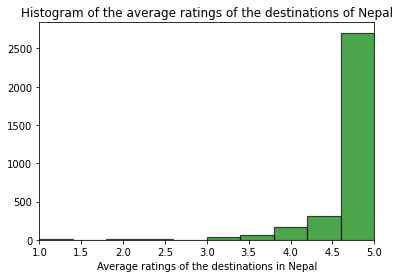

In [385]:
from matplotlib import pyplot as plt 
%matplotlib inline
plt.figure()
plt.hist(dataset['avg_rating'],color='g',alpha=.7,edgecolor='black',linewidth=1.2)
plt.xlim(dataset['avg_rating'].min(),dataset['avg_rating'].max())
plt.xlabel("Average ratings of the destinations in Nepal")
plt.title('Histogram of the average ratings of the destinations of Nepal')

### Relationship between the number of voters and the avg_rating

Text(0.5, 1.0, 'Average ratings vs Number of Votes')

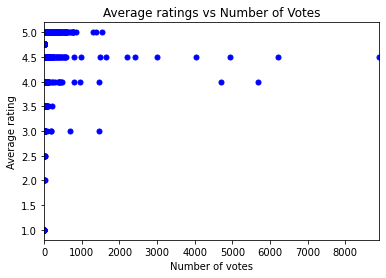

In [384]:
#scatter plot 
%matplotlib inline 
#X axis: no. of votes i.e. dataset['voted_by']
#Y axis: avg rating i.e. dataset['avg_rating']
plt.plot(dataset['voted_by'],dataset['avg_rating'],'bo',linewidth=2, markersize=5)
plt.xlim(dataset['voted_by'].min(),dataset['voted_by'].max())
plt.xlabel('Number of votes')
plt.ylabel('Average rating')
plt.title('Average ratings vs Number of Votes')

#### Evaluating ranking of religious sites in Nepal 

                                        title  avg_rating
0                            Boudhanath Stupa    4.500000
3                        Swayambhunath Temple    4.500000
5                                Peace Temple    4.500000
6                        Pashupatinath Temple    4.500000
11    Golden Temple (Hiranya Varna Mahavihar)    4.500000
...                                       ...         ...
3294                     Bindhyabasini Temple    4.771906
3296                           Resunga Temple    4.771906
3297                       Resunga Yegyashala    4.771906
3305                          Mahankal Temple    4.771906
3306              Nagarkot Buddhist Monastery    4.771906

[323 rows x 2 columns]


Text(0.5, 1.0, 'Histogram of the average ratings of the religious destinations of Nepal')

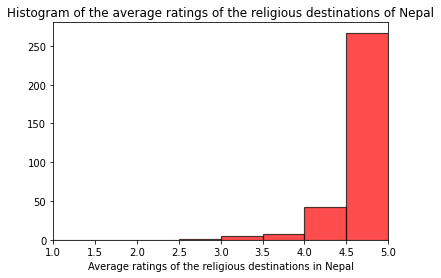

In [394]:
religious_df=dataset[dataset['religious']==True]

#printing religious destinations in Nepal with their rankings
print(religious_df.iloc[:,[0,1]])

%matplotlib inline
plt.figure()
plt.hist(religious_df['avg_rating'],color='r',alpha=.7,edgecolor='black',linewidth=1.2,bins=np.arange(0.5,5.5,0.5))
plt.xlim(dataset['avg_rating'].min(),dataset['avg_rating'].max())
plt.xlabel("Average ratings of the religious destinations in Nepal")
plt.title('Histogram of the average ratings of the religious destinations of Nepal')

Text(0.5, 1.0, 'Pie chart to classify the destination sites of Nepal')

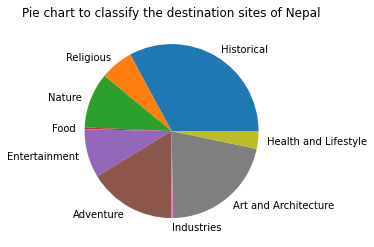

In [396]:
#count the no. of destinations by their type and present it in a pie chart 
historical_sites_no=dataset['history'].sum().sum()
religious_sites_no=dataset['religious'].sum().sum()
nature_sites_no=dataset['nature'].sum().sum()
food_sites_no=dataset['food'].sum().sum()
entertainment_sites_no=dataset['entertainment'].sum().sum()
adventure_sites_no=dataset['adventure'].sum().sum()
industries_sites_no=dataset['industries'].sum().sum()
art_and_archi_sites_no=dataset['art_and_architecture'].sum().sum()
health_and_lifestyle_sites_no=dataset['health_and_lifestyle'].sum().sum()

no_by_sites=[historical_sites_no,religious_sites_no,nature_sites_no,food_sites_no,entertainment_sites_no,\
             adventure_sites_no,industries_sites_no,art_and_archi_sites_no,health_and_lifestyle_sites_no]

#classes of sites
classes=['Historical','Religious','Nature','Food','Entertainment','Adventure','Industries','Art and Architecture',\
         'Health and Lifestyle']
plt.figure()
plt.pie(no_by_sites, labels = classes)
plt.title('Pie chart to classify the destination sites of Nepal')


### Add destination_id column to the dataset attractions_of_nepal_updated_columns.csv

In [12]:
#import dataset
dataset=pd.read_csv('./Datasets/attractions_of_nepal_updated_columns.csv')

In [13]:
print(dataset.head())

                   title  avg_rating  voted_by                genre  history  \
0       Boudhanath Stupa         4.5      8897  ['Religious Sites']     True   
1  Phewa Tal (Fewa Lake)         4.5      2988  ['Bodies of Water']    False   
2              Sarangkot         4.5      2199        ['Mountains']    False   
3   Swayambhunath Temple         4.5      6203  ['Religious Sites']     True   
4              Poon Hill         4.5      1477        ['Mountains']    False   

   art_and_architecture  nature  adventure  entertainment  \
0                  True   False      False          False   
1                 False    True      False          False   
2                 False    True      False          False   
3                  True   False      False          False   
4                 False    True      False          False   

   health_and_lifestyle   food  industries  religious  
0                 False  False       False       True  
1                 False  False       Fal

In [14]:
dataset.insert(0, 'destination_id', dataset.index)

In [15]:
dataset

,destination_id,title,avg_rating,voted_by,genre,history,art_and_architecture,nature,adventure,entertainment,health_and_lifestyle,food,industries,religious
0,0,Boudhanath Stupa,4.500000,8897,['Religious Sites'],True,True,False,False,False,False,False,False,True
1,1,Phewa Tal (Fewa Lake),4.500000,2988,['Bodies of Water'],False,False,True,False,False,False,False,False,False
2,2,Sarangkot,4.500000,2199,['Mountains'],False,False,True,False,False,False,False,False,False
3,3,Swayambhunath Temple,4.500000,6203,['Religious Sites'],True,True,False,False,False,False,False,False,True
4,4,Poon Hill,4.500000,1477,['Mountains'],False,False,True,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3308,3308,SITA (Travel Corporation India Ltd),4.771906,0,"['Multi-day Tours', 'Balloon Rides']",True,False,False,False,False,False,False,False,False
3309,3309,Himalayan Hike,4.771906,0,"['City Tours', 'Multi-day Tours']",True,True,False,False,True,False,False,False,False
3310,3310,Harilo,4.771906,0,['Farmers Markets'],False,False,False,False,True,False,True,False,False
3311,3311,Heli Sight,4.771906,0,"['Parasailing & Paragliding', 'Multi-day Tours']",False,False,False,True,False,False,False,False,False


In [16]:
dataset.to_csv('attractions_of_nepal_with_ID.csv',index=None)